In [11]:
from IPython.display import display_html, Markdown
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()+'&emsp;&emsp;&emsp;&emsp;&emsp;'
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

****Reading datasets****

In [62]:
import pandas as pd
import numpy as np
# distanceXconsume
temp_vs_speed = pd.read_csv('https://raw.githubusercontent.com/azhar2ds/Machine-Learning/Linear-Regression/car_fuel_consume.csv',usecols=[3,2],thousands=',').dropna()
car_price_over_time = pd.read_csv('https://raw.githubusercontent.com/azhar2ds/Machine-Learning/Linear-Regression/car_price_prediction.csv',usecols=[3,2]).dropna()

print("Temp VS speed num rows : %d num columns : %d" % temp_vs_speed.shape)
print("Present price VS Selling Price data num rows : %d num columns : %d " % car_price_over_time.shape)

Temp VS speed num rows : 376 num columns : 2
Present price VS Selling Price data num rows : 301 num columns : 2 


****display_side_by_side****

In [65]:
display_side_by_side(temp_vs_speed[0:6],car_price_over_time[0:6])

,speed,temp_inside
0,26,215.0
1,30,215.0
2,38,215.0
3,36,215.0
4,46,215.0
5,50,215.0
,Selling_Price,Present_Price
0,3.35,5.59
1,4.75,9.54
2,7.25,9.85


****Use Scikit-Learn linear regression****

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

****Separate inputs(features) and labels****

In [67]:
temp,speed = temp_vs_speed.iloc[:, 1:2].values, temp_vs_speed.iloc[:, 0].values
Pres_price,Sel_price = car_price_over_time.iloc[:, 1:2].values, car_price_over_time.iloc[:, 0].values

****Separate training and test dataset****

In [68]:
Pres_priceTrain, Pres_priceTest, Sel_priceTrain, Sel_priceTest = train_test_split(Pres_price,Sel_price, test_size = 1/5)
tempTrain, tempTest, speedTrain, speedTest = train_test_split(temp,speed, test_size = 1/5)
print(" Training data for selling price vs present price num rows : %d num columns : %d" % Pres_priceTrain.shape)
print(" Test data for selling price vs present price num rows     : %d num columns  : %d" % Pres_priceTest.shape)

 Training data for selling price vs present price num rows : 240 num columns : 1
 Test data for selling price vs present price num rows     : 61 num columns  : 1


****Define and train the model****

In [69]:
selPriceModel = LinearRegression()
selPriceModel.fit(Pres_priceTrain, Sel_priceTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

****Predicting the price of 2 old cars****

In [70]:
car_price_over_time[2:4]

,Selling_Price,Present_Price
2,7.25,9.85
3,2.85,4.15


In [71]:
selPriceModel.predict([[9.85],[4.15]])

array([6.08781041, 2.67875564])

*****Well till here its little bit close prediction*****

In [72]:
selPriceModel.predict([[9.85],[4.15]])

array([6.08781041, 2.67875564])

In [ ]:
#####training a new model using the speed vs temperature data set#####

In [73]:
display_side_by_side(temp_vs_speed[0:6],car_price_over_time[0:6])

,speed,temp_inside
0,26,215.0
1,30,215.0
2,38,215.0
3,36,215.0
4,46,215.0
5,50,215.0
,Selling_Price,Present_Price
0,3.35,5.59
1,4.75,9.54
2,7.25,9.85


****Training the model again for prediction****

In [75]:
speedModel = LinearRegression()
speedModel.fit(tempTrain, speedTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
temp_vs_speed.iloc[[0,312]]

,speed,temp_inside
0,26,215.0
324,29,22.0


In [77]:
speedModel.predict([[215],[22]])

array([41.75259206, 42.88787727])

####  OPPS!!! Its not a good predictive model#####

For linear regression we know Y=MX+C

Inorder to minimise the error and predict a good model then we have to optimise the M and C values.

Here it comes the LOSS FUNCTION or COST FUNCTION(J)
It's the function that we will use during training to know if our model is learning well the patterns in the data

****Lets plot a graph and see our model****

In [78]:
import matplotlib.pyplot as plt 
def scatterAnndPlot(x,y,yPred,title,xlabel,ylabel,ax,c):
    ax[c].scatter(x, y, color = 'red')
    ax[c].plot(x, yPred, color = 'blue')
    ax[c].set_title(title)
    ax[c].set_xlabel(xlabel)
    ax[c].set_ylabel(ylabel)

In [79]:
def createSubPlotsEspace(num_rows, num_columns):
    fig, ax = plt.subplots(nrows=num_rows, ncols=num_columns)
    fig.set_size_inches(w=25,h=7)
    return ax

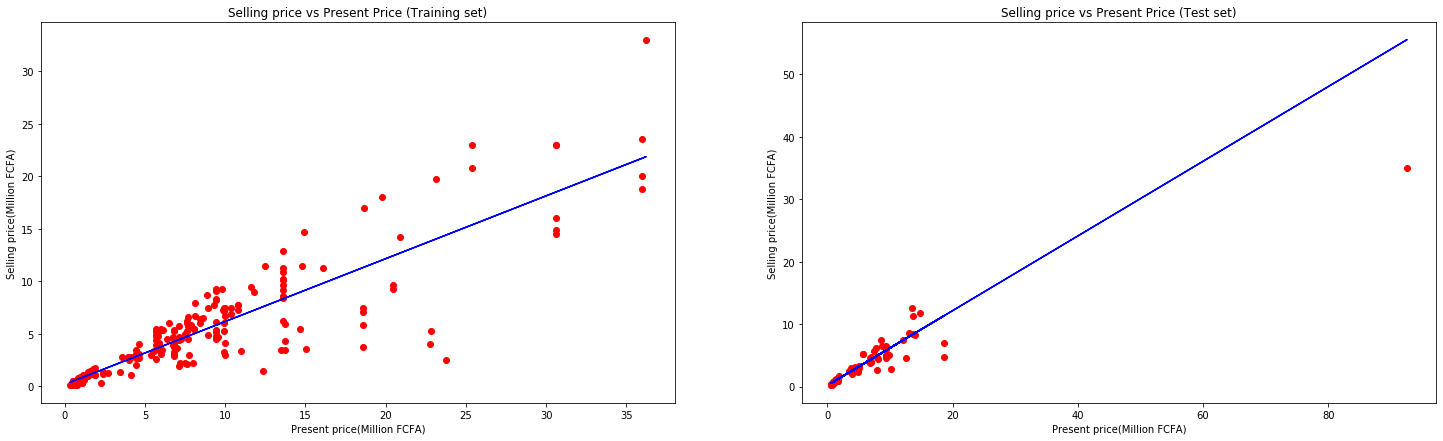

In [80]:
# batch prediction
Sel_pricePredictionTrain = selPriceModel.predict(Pres_priceTrain)
Sel_pricePredictionTest = selPriceModel.predict(Pres_priceTest)
# plot real vs predicted values
PresentVsSellingSpace = createSubPlotsEspace(1,2)
scatterAnndPlot(Pres_priceTrain,Sel_priceTrain,Sel_pricePredictionTrain,
                'Selling price vs Present Price (Training set)',
                'Present price(Million FCFA)',
                'Selling price(Million FCFA)',
                PresentVsSellingSpace,0)
scatterAnndPlot(Pres_priceTest,Sel_priceTest,Sel_pricePredictionTest,
                'Selling price vs Present Price (Test set)',
                'Present price(Million FCFA)',
                'Selling price(Million FCFA)',
                PresentVsSellingSpace,1)

#### How to find loss function####
                                                                                                            #azhar2ds@gmail.com
First we have to find 
* Mean Absoluter Error(L1) 
* Mean Squared Error(L2)
L1 = $\frac{1}{N} \sum_{i=1}^N|Yi-Ypred$| 
=> $\frac{1}{N} \sum_{i=1}^N(Yi-(axi+b))
All error are treated equally.


L2 = $\frac{1}{N} \sum_{i=1}^N(Yi-Ypred)^2$
=> $\frac{1}{2N} \sum_{i=1}^N(Yi-Ypred)^2$
=> $\frac{1}{2N} \sum_{i=1}^N(Yi-(axi+b))^2$
Important errors are amplified whereas small error are neglected.

***Note:We want to minimize this function. The smaller the value of this function the better our model.

    Vectorization is key.
Implement the L2 cost function with vectorization.
BLAS (Basic Linear Algebra Subprogram) => Fast and cleaner code
Matrix multiplication and Transpose, Wise element operation
$ \theta_{1} * x + \theta_{0} == \theta_{1} * x + \theta_{0} * 1$

In [81]:
Theta0, Theta1, x = 2,3,4
Theta = np.array([2,3]).reshape(-1,1) #Transform to vector
X = np.array([1,4]).reshape(1,-1)
print("Non vectorized : ", Theta1*x+Theta0)
print("Vectorized     : ", np.matmul(X, Theta))

Non vectorized :  14
Vectorized     :  [[14]]


In [90]:
# make this take unlimited datasets
def addOnesToDataset(X): 
    N=len(X)
    oneVector = np.ones((N,1))
    return np.hstack((oneVector,X))

In [91]:
tempTrainWith1, tempTestWith1, Pres_priceTrainWith1, Pres_priceTestWith1 = addOnesToDataset(tempTrain),addOnesToDataset(tempTest), addOnesToDataset(Pres_priceTrain), addOnesToDataset(Pres_priceTest)

****L2 Function****

In [93]:
def L2(X,Y,prameters):
    N = len(X)
    diffVector = np.matmul(X,prameters.reshape(-1,1)) - Y.reshape(-1,1)
    diffVectorSquare=np.power( diffVector ,2)
    sumTerm = np.sum(diffVectorSquare)
    return sumTerm / (2*N);

****Let's have this done in a second****

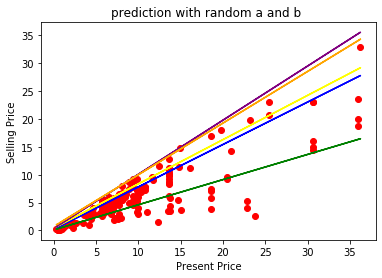

In [94]:
a= np.random.rand(5) 
b= np.random.rand(5) 
colors = ['blue','yellow','purple','orange','green']
plt.scatter(Pres_priceTrain, Sel_priceTrain, color = 'red')
for i in range(0,5):
    randomPrediction = Pres_priceTrain*a[i]+b[i]
    plt.plot(Pres_priceTrain,randomPrediction, color = colors[i])
    plt.title("prediction with random a and b ")
    plt.xlabel("Present Price")
    plt.ylabel("Selling Price")
plt.show()

****Implementing with vectorization****

In [99]:
def gradientDescent(X, Y, theta, alpha, epochs): # an epochs is just a fancy term that mean that we have read all the data
    N=len(X) # Number of training examples
    J_over_epochs = np.zeros((epochs+1, 1))  # we will save our erros while training our model 
    theta1_over_epochs = np.zeros((epochs+1, 1)) # we will save values of our theta1 over epochs 
    J_over_epochs[0] = L2(X,Y,theta) # we will also save  initial theta1 and J before runnig gradient descent
    theta1_over_epochs[0] = theta[1]
    for i in range(1,epochs+1):
        ysDiff  = np.matmul(X,theta) - Y.reshape(-1,1) # compute difference between real Y and predicted Y 
        sumForEveryTheta = np.matmul(ysDiff.transpose(),X) # this is a vector of the same size as theta
        gradients = sumForEveryTheta * (1/N) * alpha # element wise multiplication (gradients = sumForEveryTheta * (alpha/m))
        theta = theta-gradients.transpose() # new values of theta 
        theta1_over_epochs[i] = theta[1]
        J_over_epochs[i] = L2(X,Y,theta) 
    return J_over_epochs,theta1_over_epochs, theta

****Gradiant descent****

In [100]:
def plotGradientDescent(theta1,J,k,lr,ax,c):
    #global ax
    initial_theta1  = theta1[0]
    J0 = J[0]
    
    ax[c].plot(theta1,J,c='red')

    ax[c].annotate('Starting point', xy=(initial_theta1,J0 ), xytext=(initial_theta1+0.05,J0-1),
            arrowprops=dict(facecolor='black', shrink=0.01),fontsize=15
            )

    ax[c].set_xlabel('theta1',fontsize=20)
    ax[c].set_ylabel('J(error)',fontsize=20)
    ax[c].set_title('L2 Gradient Descent with a %s Learning Rate = %.4f' % (k,lr),fontsize=15)

In [103]:
def plotLossOverEpochs(epochs,J,ax,k,lr,c):
    ax[c].plot(np.arange(0,epochs+1).reshape(-1,1),J,c='red')
    ax[c].set_xlabel('Epochs',fontsize=20)
    ax[c].set_ylabel('J(error)',fontsize=20)
    ax[c].set_title('Loss over epochs with a %s Learning Rate = %.4f' % (k,lr),fontsize=15)

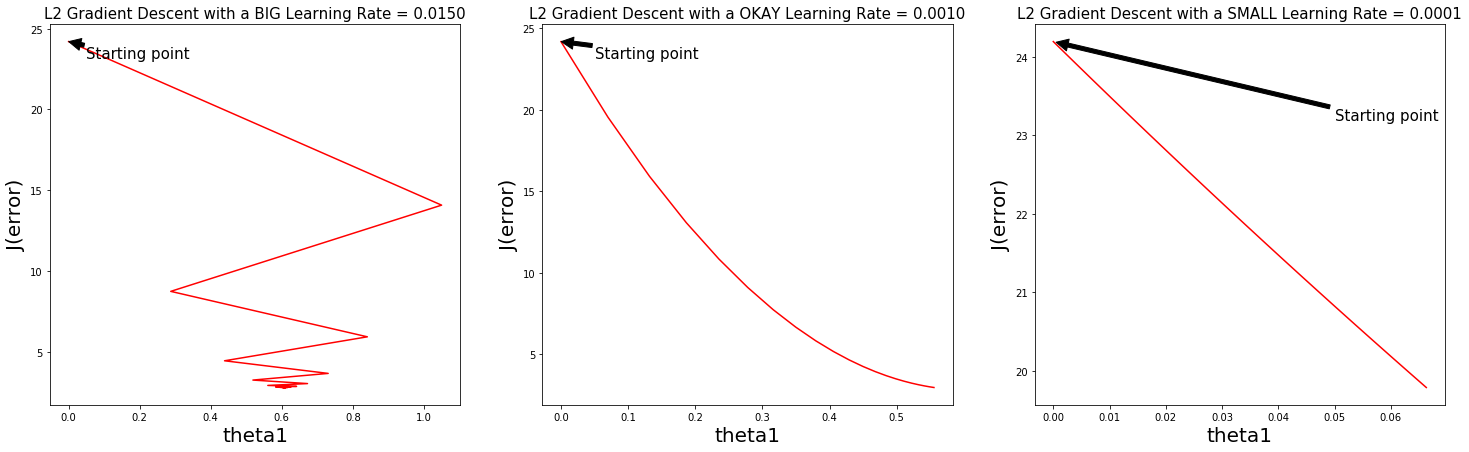

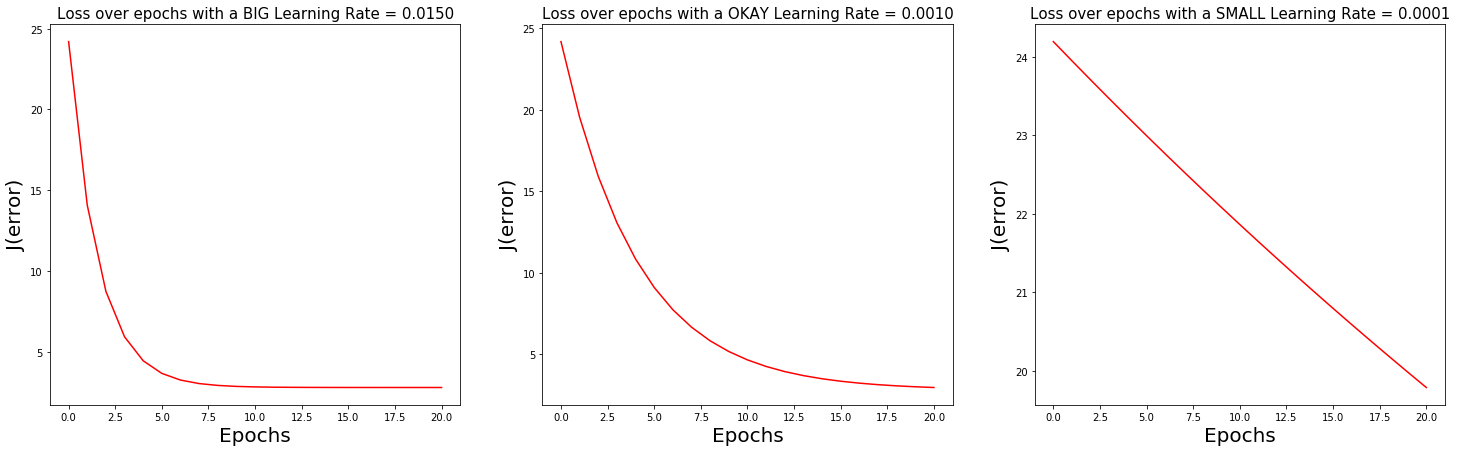

In [104]:
initialTheta = np.zeros((2,1))
epochs = 20
learningRates = {'BIG':0.015,'OKAY':0.001, 'SMALL':0.00005}
thetas = {} # contains final theta for every  learning rate

ThetaVsLossSpace =  createSubPlotsEspace(1,3) # subplots to contain all our three gradient graphic for the different learning rates
LossOverEpochsSpace = createSubPlotsEspace(1,3) # subplots to contain all our three loss over epochs graphic for the different learning rates

for i,(k,lr) in enumerate(learningRates.items()):   
    all_J,theta1_over_epochs,thetas[k] = gradientDescent(Pres_priceTrainWith1,Sel_priceTrain,initialTheta,lr,epochs)  # training a model for the actual learninng rate
    
    plotGradientDescent(theta1_over_epochs,all_J,k,lr,ThetaVsLossSpace,i) # plot gradient descent for every learning rate
    
    plotLossOverEpochs(epochs,all_J,LossOverEpochsSpace,k,lr,i)        # plot loss over epochs for every learning rate

****Final Model****

In [105]:
for k,theta in thetas.items():
    print(k,' : ', theta.reshape(-1))

BIG  :  [0.06208063 0.60598566]
OKAY  :  [0.03836006 0.55556523]
SMALL  :  [0.00447047 0.06630969]


**** Finally Y=MX+C****

In [108]:
finalTheta = thetas['OKAY']
print("Our Model : Y = %f * x + %f" % tuple(finalTheta)[::-1])

Our Model : Y = 0.555565 * x + 0.038360


****Defining a predictive function****

In [109]:
def predict(X, theta):
    return np.matmul(X,theta)

****Predict & Plot****

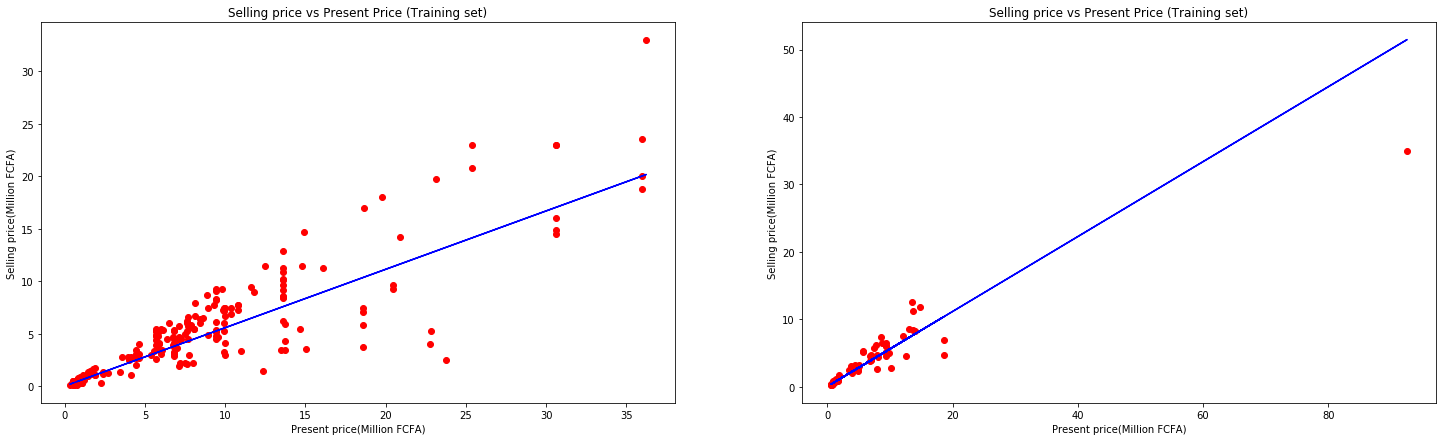

In [110]:
# prediction for training and test set
our_model_sel_price_train_pred = predict(Pres_priceTrainWith1,finalTheta)
our_model_sel_price_test_pred = predict(Pres_priceTestWith1,finalTheta)

# plot training and test prediction vs real values

selPriceVsPresentPriceSpace = createSubPlotsEspace(1,2)
scatterAnndPlot(Pres_priceTrain,Sel_priceTrain,our_model_sel_price_train_pred,
                'Selling price vs Present Price (Training set)',
                'Present price(Million FCFA)',
                'Selling price(Million FCFA)',
                selPriceVsPresentPriceSpace,0
               )
scatterAnndPlot(Pres_priceTest,Sel_priceTest,our_model_sel_price_test_pred,
                'Selling price vs Present Price (Training set)',
                'Present price(Million FCFA)',
                'Selling price(Million FCFA)',
                selPriceVsPresentPriceSpace,1
               )


****compare with Scikit-Learn Model****

In [111]:
# give the error for train and test data
from sklearn.metrics import mean_squared_error

def give_me_my_errors(yTrain,yTrainPred,yTest,yTestPred):
    mseTrain = mean_squared_error(yTrain, yTrainPred)
    mseTest = mean_squared_error(yTest, yTestPred)
    return mseTrain, mseTest

****Batch Predict****

In [112]:
Sel_pricePredictionTrain = selPriceModel.predict(Pres_priceTrain)
Sel_pricePredictionTest = selPriceModel.predict(Pres_priceTest)

In [121]:
# compute scikit-learn model errors
mseTrain,mseTest = give_me_my_errors(Sel_priceTrain, Sel_pricePredictionTrain,Sel_priceTest, Sel_pricePredictionTest)

# compute our model errors
trainingError = L2(Pres_priceTrainWith1,Sel_priceTrain,finalTheta)
testError = L2(Pres_priceTestWith1,Sel_priceTest,finalTheta)

display(Markdown("### **~~ScikitLearn~~** : Error on Training data : **%f**; Error on Test data : **%f** " % (mseTrain,mseTest)))
display(Markdown("### **Our Model**       : Error on Training data : **%f**; Error on Test data : **%f**  " % (trainingError,testError)))

### **~~ScikitLearn~~** : Error on Training data : **5.596288**; Error on Test data : **9.345371** 

### **Our Model**       : Error on Training data : **2.965093**; Error on Test data : **3.420595**  

#####Actual Error and old Problem with (Speed Vs Temperature)#####

In [119]:
speedPredTrain = speedModel.predict(tempTrain)
speedPredTest = speedModel.predict(tempTest)
# Get erros
mseTrain,mseTest = give_me_my_errors(speedTrain, speedPredTrain,speedTest, speedPredTest)
display(Markdown("Error on Training data : **%f** <br> Error on Test data     : **%f**" % (mseTrain,mseTest)))

Error on Training data : **179.897715** <br> Error on Test data     : **216.482795**

***Regression Line Plot***

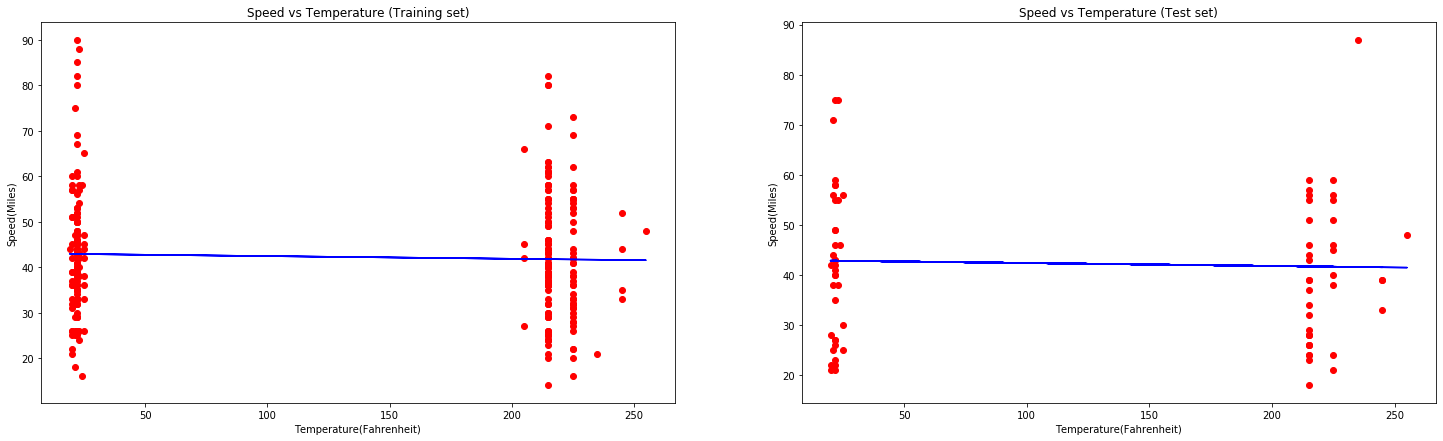

In [120]:
speedVsTemPlotSpace = createSubPlotsEspace(1,2)
scatterAnndPlot(tempTrain,speedTrain,speedPredTrain,
                'Speed vs Temperature (Training set)',
                'Temperature(Fahrenheit)','Speed(Miles)',
                   speedVsTemPlotSpace,0)
scatterAnndPlot(tempTest,speedTest,speedPredTest,
                'Speed vs Temperature (Test set)',
                'Temperature(Fahrenheit)','Speed(Miles)',
                   speedVsTemPlotSpace,1)

Thank YOU  😪
azhar2ds@gmail.com